Business Understanding

The boss man wants low risk aircraft. 

# Data Understanding

In [179]:
import pandas as pd
import numpy as np

In [180]:
ad = pd.read_csv('Aviation_Data.csv', low_memory=False) #named dataset "ad" for simplicity

In [181]:
ad.info() #see what the dataset looks like


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [182]:
ad.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [183]:
ad['Aircraft.Category'].describe()

count        32287
unique          15
top       Airplane
freq         27617
Name: Aircraft.Category, dtype: object

In [184]:
ad['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [185]:
ad['Amateur.Built'].describe()

count     88787
unique        2
top          No
freq      80312
Name: Amateur.Built, dtype: object

In [186]:
ad['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

# Data Preparation

## Data Cleaning

In [187]:
"""
Here I'm going to drop all of the columns that aren't of interest to me.  I'm interested in 
knowing whehter amateur vs. professional built aircrafts are lower risk, which aircraft type
is lowest risk, and which number of engines are lowest risk based on the number of injuries
they have.
"""

ad.drop(columns = ['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude', 
                  'Airport.Code', 'Airport.Name', 'Aircraft.damage', 'Registration.Number', 'FAR.Description', 
                  'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 'Longitude', 
                  'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Injury.Severity'], inplace=True)

In [188]:
ad = ad.drop_duplicates() #drop duplicate values

In [189]:
### Now I have all of the columns I want to do my analysis so I'm going to check and see if those
### columns have any missing data. 

ad.isna().sum()

Accident.Number               1
Aircraft.Category         56603
Make                         64
Model                        93
Amateur.Built               103
Number.of.Engines          6084
Engine.Type                7076
Total.Fatal.Injuries      11402
Total.Serious.Injuries    12511
Total.Minor.Injuries      11934
Total.Uninjured            5913
dtype: int64

In [190]:
""" The injuries seem to have a large amount of missing data but it looks like if there were no
injuries that they left the cell blank so I'm going to replace all of these missing data with 0's"""

ad['Total.Fatal.Injuries'] = ad['Total.Fatal.Injuries'].fillna(value=0)
ad['Total.Serious.Injuries'] = ad['Total.Serious.Injuries'].fillna(value=0)
ad['Total.Minor.Injuries'] = ad['Total.Minor.Injuries'].fillna(value=0)
ad['Total.Uninjured'] = ad['Total.Uninjured'].fillna(value=0)

In [191]:
### the rest of the missing data makes up about 8% of a large dataset so I'm going to remove those
ad = ad.dropna()

In [192]:
###Now I have finished cleaning the Data and I have 8 columns with 28k accidends of information that I'm interested in 

print('Sum of Missing Values in Each Column:  ', ad.isna().sum())
print('Shape of the dataset:  ', ad.shape)

Sum of Missing Values in Each Column:   Accident.Number           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
dtype: int64
Shape of the dataset:   (25928, 11)


## Feature Engineering

In [193]:
ad.head()

,Accident.Number,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
7,SEA82DA022,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0
8,NYC82DA015,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
12,FTW82FRJ07,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0
13,FTW82FRA14,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0


# Analysis

In [194]:
### The first thing I wanted to do was see if there was a difference in the amount of people 
### injured in aircraft that were built by amateurs or not. 

ad.groupby(['Amateur.Built']).sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Amateur.Built,,,,,
No,26238.0,7907.0,5892.0,4617.0,101641.0
Yes,3120.0,847.0,705.0,666.0,2035.0


In [195]:
### I'm going to make a new set with only the professonal built aircraft since they are less risky

adp = ad[ad['Amateur.Built']=='No']
adp.head()

,Accident.Number,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
7,SEA82DA022,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0
8,NYC82DA015,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
12,FTW82FRJ07,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0
13,FTW82FRA14,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0


In [196]:
adp.groupby(['Aircraft.Category']).sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Aircraft.Category,,,,,
Airplane,23162.0,6907.0,4966.0,3821.0,98231.0
Balloon,36.0,7.0,53.0,23.0,172.0
Blimp,6.0,0.0,0.0,3.0,4.0
Glider,65.0,22.0,31.0,21.0,78.0
Gyrocraft,25.0,5.0,9.0,3.0,17.0
Helicopter,2727.0,894.0,752.0,634.0,3080.0
Powered Parachute,78.0,14.0,30.0,64.0,22.0
Powered-Lift,2.0,0.0,1.0,0.0,2.0
Rocket,1.0,1.0,0.0,1.0,0.0


In [197]:
### I'm going to make a new set with only airplanes since they are less risky

ada = adp[adp['Aircraft.Category']=='Airplane']
ada.head()


,Accident.Number,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
7,SEA82DA022,Airplane,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0
8,NYC82DA015,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
12,FTW82FRJ07,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0
13,FTW82FRA14,Airplane,Cessna,R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0


In [198]:
ada.groupby(['Number.of.Engines']).sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,,,,
0.0,1.0,2.0,7.0,229.0
1.0,4458.0,3555.0,2968.0,19133.0
2.0,2180.0,1321.0,715.0,67200.0
3.0,4.0,26.0,96.0,5028.0
4.0,264.0,62.0,35.0,6641.0
8.0,0.0,0.0,0.0,0.0


In [199]:
adpj = ada[ada['Number.of.Engines'] > 1.0]
adpj.head()

,Accident.Number,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
5,NYC79AA106,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0
8,NYC82DA015,Airplane,Cessna,401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0
25,DCA82AA008,Airplane,Cessna,414A,No,2.0,Reciprocating,8.0,0.0,0.0,0.0
26,ATL82FA033,Airplane,Beechcraft,BE-58,No,2.0,Reciprocating,1.0,0.0,0.0,0.0
33,LAX82FA038,Airplane,Piper,PA-34-200T,No,2.0,Reciprocating,2.0,0.0,0.0,0.0


In [200]:
adpj.drop(columns = ['Number.of.Engines'], inplace = True)

C:\Users\joshg\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [201]:
adpj.groupby(['Engine.Type']).sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,
Electric,0.0,0.0,0.0,0.0
Geared Turbofan,0.0,0.0,0.0,121.0
Reciprocating,1067.0,329.0,259.0,2131.0
Turbo Fan,816.0,889.0,471.0,67076.0
Turbo Jet,58.0,76.0,39.0,6219.0
Turbo Prop,494.0,110.0,76.0,2951.0
Turbo Shaft,3.0,0.0,0.0,11.0
Unknown,10.0,5.0,1.0,360.0


In [202]:
adturbo = adpj[adpj['Engine.Type'] == 'Turbo Jet']
adturbo.head()

,Accident.Number,Aircraft.Category,Make,Model,Amateur.Built,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
221,CHI82DA033,Airplane,Grumman,1159,No,Turbo Jet,0.0,0.0,0.0,4.0
320,LAX82IA075,Airplane,Boeing,B737-2H4,No,Turbo Jet,0.0,0.0,0.0,119.0
351,FTW82IA062,Airplane,Boeing,B-727-200,No,Turbo Jet,0.0,0.0,0.0,83.0
547,LAX82DA105,Airplane,Cessna,501,No,Turbo Jet,0.0,0.0,0.0,2.0
558,LAX82AA106A,Airplane,Boeing,KC-135A,No,Turbo Jet,6.0,0.0,0.0,0.0


In [214]:
adturbo['Make'].describe()
adturbo['Make'] = adturbo['Make'].str.capitalize()
adturbo = adturbo.dropna()

<ipython-input-214-34735ce5a686>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adturbo['Make'] = adturbo['Make'].str.capitalize()


In [234]:
adturbo['Make'] = adturbo['Make'].replace("Bonbardier", "Bombardier")
adturbo['Make'] = adturbo['Make'].replace("Gulfstream american corp.", "Gulfstream aerospace")
adturbo['Make'] = adturbo['Make'].replace("Learjet inc", "Learjet")
adturbo['Make'] = adturbo['Make'].replace("Mcdonnell douglas aircraft co", "Mcdonnell douglas")
adturbo['Make'] = adturbo['Make'].replace("Embraer executive aircraft inc", "Embraer")
adturbo['Make'] = adturbo['Make'].replace("Gates lear jet", "Learjet")
adturbo['Make'] = adturbo['Make'].replace("Gates learjet", "Learjet")

In [255]:
adturbo.groupby(['Make']).sum()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Airbus industrie,0.0,4.0,2.0,569.0
Bac,0.0,0.0,0.0,48.0
Beech,0.0,2.0,2.0,0.0
Boeing,14.0,43.0,10.0,3394.0
Bombardier,0.0,0.0,0.0,43.0
Cessna,14.0,19.0,1.0,30.0
Dassault-breguet,0.0,0.0,0.0,5.0
Douglas,0.0,1.0,18.0,320.0
Eclipse aviation corp,0.0,0.0,0.0,4.0


In [236]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

<BarContainer object of 118 artists>

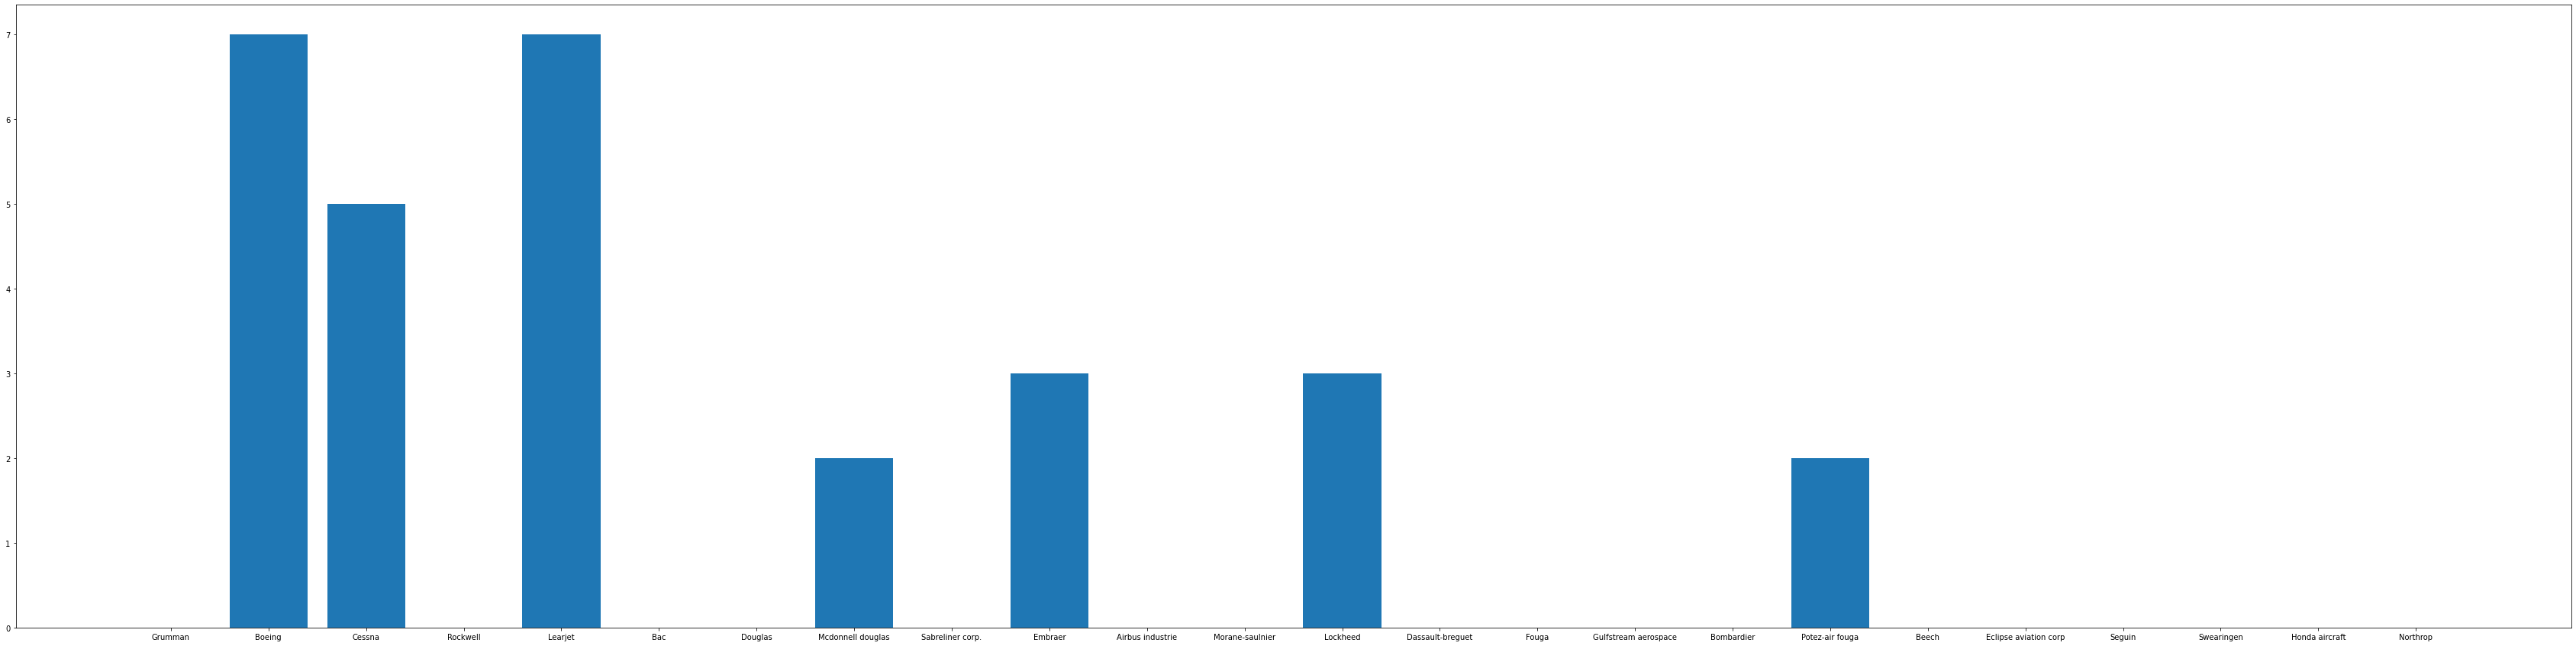

In [250]:
# Set up plots
fig, ax1 = plt.subplots(ncols=1, figsize=(60, 15))

# Plot data
ax1.bar(adturbo['Make'], adturbo['Total.Fatal.Injuries'])




# Conclusions

### This analysis leads to three recommendations for least risky aircraft for the company to purchase



#### 1. Purchase aircrafts that have been made by professionals and not amateurs.  More people and a higher percentage of people are injured in aircraft accidents when the aircraft is built by amateurs. 

#### 2. Purchase airplanes.  There were 15 different categories of aircraft that were involved in accidents and the highest percentage of people involved in these accidents that were uninjured were involved in airplane accidents. 

#### 3. Purchase airplanes with 3 engines.  A higher percentage of people were injured in airplane accidents when the airplane had only 1 or 2 engines.  People involved in accidents were uninjured at a higher rate in airplanes that had 3 or 4 engines with 3 engines having the safest accident reports

### Create plot
amateur_built_fig, injuries_axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

injuries_axes[0].set_title('Injuries in Amateur vs. Professional Built Aircraft')
injuries_axes[0].set_ylabel('Number of Injuries')
injuries_axes[0].set_xlabel('Amateur vs. Professional')

injuries = ad['Total.Fatal.Injuries']

injuries_axes[0].hist(injuries, bins =15)

plt.show()

Exploratory Data Analysis

Conclusions

Limitations

Recommendations

Next Steps